In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/crowdflower.tsv")
model: Model = create_model(kind="neural_network", encoding="tfidf", base_size=16, depth=3)

In [2]:
train, valid = dataset.fold(0, 5)
model.train(train)
accuracy, cm = model.evaluate(valid, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

Predicting: 100%|██████████| 250/250 [00:03<00:00, 72.08it/s]


Accuracy: 23.76%


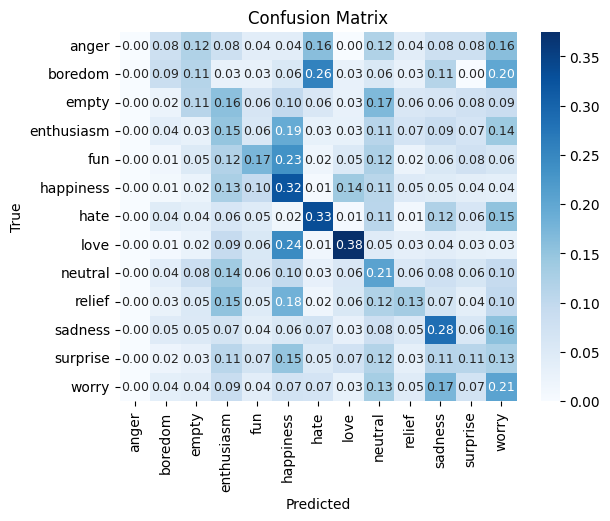

In [3]:
print(f"Accuracy: {accuracy*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()